In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kieranpoc/steam-reviews")

print("Path to dataset files:", path)

100%|██████████| 16.1G/16.1G [02:53<00:00, 99.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kieranpoc/steam-reviews/versions/2


In [ ]:
#!unzip '/root/.cache/kagglehub/datasets/kieranpoc/steam-reviews/versions/2'

In [26]:
datafile= '/root/.cache/kagglehub/datasets/kieranpoc/steam-reviews/versions/2/*.csv'
df = dd.read_csv(
    datafile,
    blocksize="64MB",
    on_bad_lines='skip',
    dtype={'steam_china_location': 'object'},
)

df.head()

,recommendationid,appid,game,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,...,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,147449116,10,Counter-Strike,76561199183984450,51,12,2548,0,2480,1696305457,...,1,99,2,0.889438,0,1,0,0,1,<NA>
1,147374264,10,Counter-Strike,76561198099573060,226,13,2369,0,2361,1696096555,...,1,122,8,0.914834,0,1,0,0,1,<NA>
2,147357703,10,Counter-Strike,76561199080026894,118,23,13501,212,12957,1697630734,...,1,599,20,0.968375,3,1,0,0,1,<NA>
3,147345102,10,Counter-Strike,76561198068970227,28,1,10668,640,9906,1698261011,...,1,59,12,0.826206,0,0,0,0,1,<NA>
4,147284743,10,Counter-Strike,76561199137893460,19,5,543,10,526,1697810991,...,1,128,24,0.853612,0,1,0,0,1,<NA>


In [27]:
#Dropping some columns
df = df.drop(['hidden_in_steam_china', 'steam_china_location', 'appid', 'author_playtime_last_two_weeks', 'author_last_played'], axis= 1)
df.head()

,recommendationid,game,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_at_review,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,147449116,Counter-Strike,76561199183984450,51,12,2548,2480,schinese,抛去不开英文输入法就闪退的bug来说，这款游戏已经赢了CS2太多，而且正因为里面都是大叔级别...,1696179329,1696179329,1,99,2,0.889438,0,1,0,0
1,147374264,Counter-Strike,76561198099573060,226,13,2369,2361,russian,Ну что после удаление csgo ты решил вернуться?,1696095988,1696095988,1,122,8,0.914834,0,1,0,0
2,147357703,Counter-Strike,76561199080026894,118,23,13501,12957,schinese,总是在电脑旁看见爸爸玩CS，我想这有什么好玩的，为什么不去玩CSGO，更优秀的画质与手感，后...,1696081938,1696081938,1,599,20,0.968375,3,1,0,0
3,147345102,Counter-Strike,76561198068970227,28,1,10668,9906,russian,"Зашёл на сервак, а там какие-то пацаны рассказ...",1696069066,1696069066,1,59,12,0.826206,0,0,0,0
4,147284743,Counter-Strike,76561199137893460,19,5,543,526,schinese,cs2出了真他妈傻逼以后就玩cs1.6了靠,1695999199,1695999199,1,128,24,0.853612,0,1,0,0


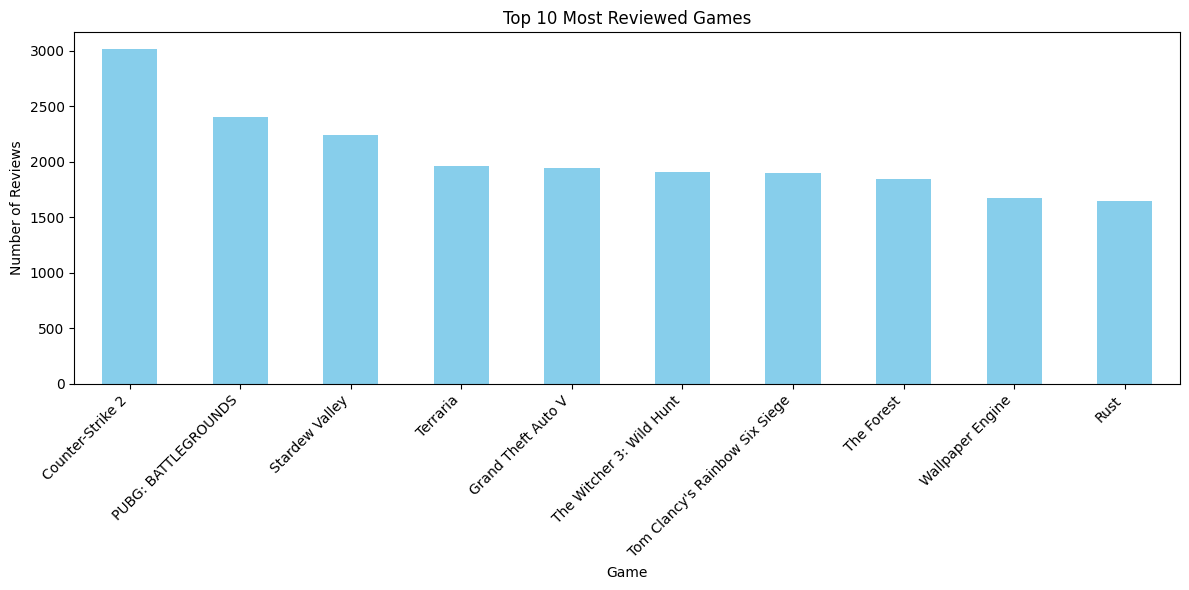

In [28]:
review_counts = df['game'].value_counts().compute()
top_10 = review_counts.nlargest(10)
plt.figure(figsize=(12, 6))
top_10.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Reviewed Games")
plt.xlabel("Game")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

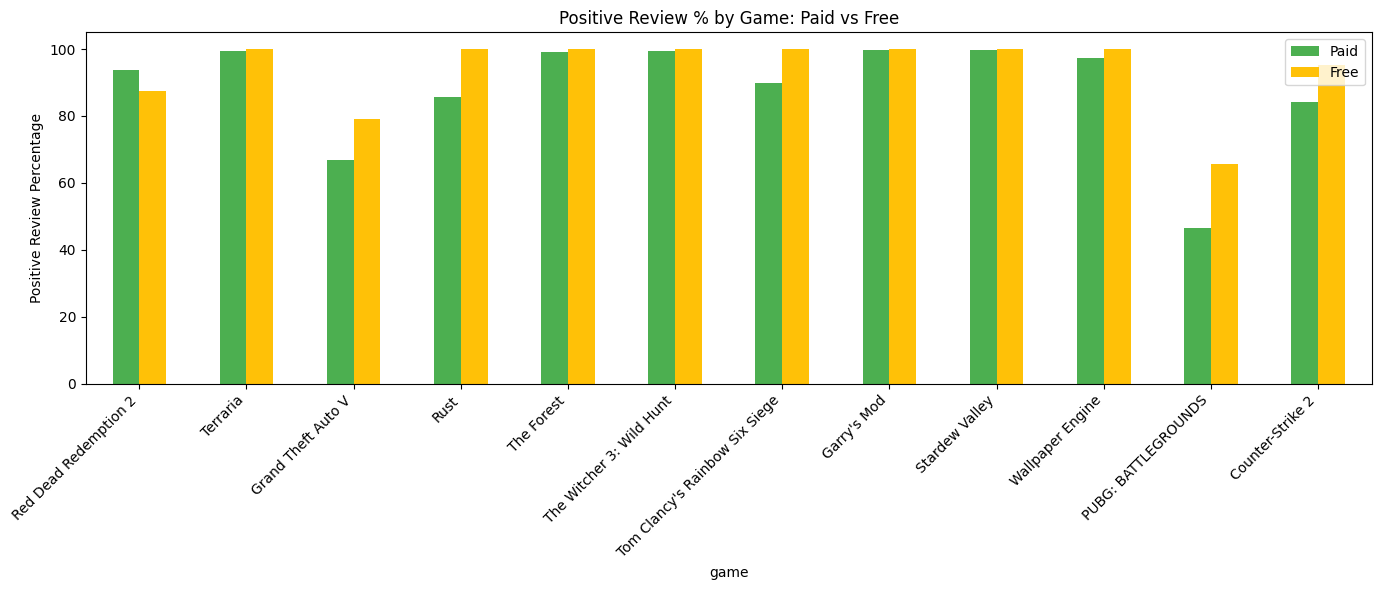

In [38]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
top_games = df['game'].value_counts().nlargest(12).compute().index.tolist()
filtered_df = df[df['game'].isin(top_games)]
grouped = filtered_df.groupby(['game', 'received_for_free'])['voted_up'].mean().compute()
pivot_df = grouped.unstack('received_for_free')
pivot_df.columns = ['Paid', 'Free']
pivot_df *= 100
pivot_df.plot(kind='bar', figsize=(14, 6), color=['#4CAF50', '#FFC107'])
plt.ylabel('Positive Review Percentage')
plt.title('Positive Review % by Game: Paid vs Free')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


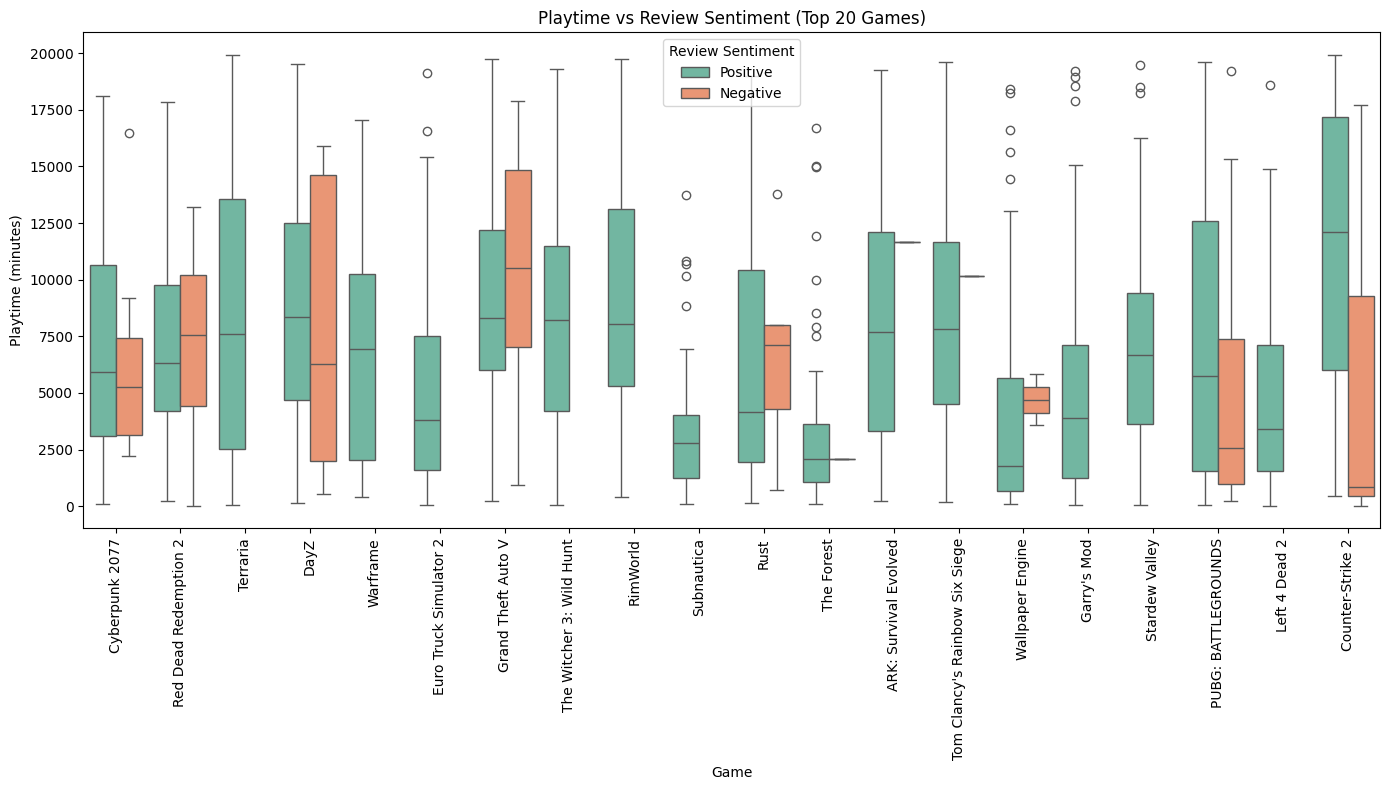

In [40]:

top_games = df['game'].value_counts().nlargest(20).index.compute()

df_top = df[df['game'].isin(top_games)]

df_sample = df_top[['game', 'author_playtime_forever', 'voted_up']].dropna().sample(frac=0.05).compute()

df_sample = df_sample[df_sample['author_playtime_forever'] < 20000]

df_sample['voted_up'] = df_sample['voted_up'].map({1: 'Positive', 0: 'Negative'})

plt.figure(figsize=(14, 8))
sns.boxplot(x='game', y='author_playtime_forever', hue='voted_up', data=df_sample, palette='Set2')
plt.xticks(rotation=90)
plt.title('Playtime vs Review Sentiment (Top 20 Games)')
plt.xlabel('Game')
plt.ylabel('Playtime (minutes)')
plt.legend(title='Review Sentiment')
plt.tight_layout()
plt.show()
